# DS4A / COLOMBIA 4.0 

# Tema: Comportamiento del consumidor en el comercio electrónico

Data science for the digital future

- Ximena Rios Cotazo

- Ramon Manuel Sandoval 



## E-Commerce 

El comercio electrónico se define como la actividad de compra o venta de bienes a través de medios electrónicos en línea o en la red mundial. La llegada de Internet permitió un crecimiento sin precedentes de los canales de comunicación en todo el mundo. Como resultado, surgieron industrias y se desarrollaron mercados para compras en línea para satisfacer la demanda de productos que no estaban disponibles en el país.

El comercio electrónico ha dado lugar a un cambio en las estrategias de marketing y publicidad, lo que permite a las empresas llegar a los usuarios a través de múltiples canales (es decir, aplicaciones móviles) y expandir su alcance con un esfuerzo mínimo. En consecuencia, esto también ha generado cantidades sustanciales de datos del consumidor, que a través de un análisis matemático cuidadoso ofrece una capacidad poderosa pero perspicaz para reducir los comportamientos de gasto del consumidor, que a su vez impulsa sus ventas.

Además, la publicidad programática adaptada específicamente y la extracción de datos del consumidor ha provocado una nueva ola de empresas e industrias. El crecimiento exponencial de los datos generados a través de la "experiencia de compra en línea" permite a las empresas aprender y extraer información fundamental de las transacciones para desarrollar una visión de los segmentos de clientes, los sesgos, los precios y los hábitos de gasto.

## Planteamiento del problema

¿Qué aspectos del comportamiento en línea de los consumidores son útiles para que las empresas comprendan mejor a sus clientes y predigan las tendencias del consumidor, los hábitos de gasto y las variables relacionadas con las compras?

## Objetivos

- Comprensión y limpieza de datos
- Análisis y modelado
- Modelos de predicción
- Visualizacion de la información

## Requerimientos

In [99]:
import os

In [100]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


# DATASET:  Conjunto de datos públicos brasileños de comercio electrónico de Olist

Este es un conjunto de datos públicos de comercio electrónico brasileño de pedidos realizados en Olist Store, tomado de [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv ). El conjunto de datos tiene información de 100k pedidos realizados entre el 2016 y 2018 en múltiples mercados en Brasil. Sus características permiten ver un pedido desde múltiples dimensiones: desde el estado del pedido, el precio, el pago y el desempeño del flete hasta la ubicación del cliente, los atributos del producto y finalmente las reseñas escritas por los clientes. También publicamos un conjunto de datos de geolocalización que relaciona los códigos postales brasileños con las coordenadas lat / lng.

**Contexto**
Este conjunto de datos fue proporcionado generosamente por Olist, la tienda por departamentos más grande de los mercados brasileños. Olist conecta pequeñas empresas de todo Brasil con canales sin problemas y con un solo contrato. Estos comerciantes pueden vender sus productos a través de Olist Store y enviarlos directamente a los clientes mediante los socios logísticos de Olist. 

Después de que un cliente compra el producto en Olist Store, un vendedor recibe una notificación para cumplir con ese pedido. Una vez que el cliente recibe el producto, o se vence la fecha estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota por la experiencia de compra y escribir algunos comentarios.

**Atención**
Un pedido puede tener varios artículos.
Cada artículo puede ser realizado por un vendedor distinto.
Todo el texto que identifica tiendas y socios fue reemplazado por los nombres de las grandes casas. 

**Esquema de datos**
Para una mejor comprensión y organización, los conjuntos de datos proporcionados se distribuyen en nueve conjuntos primarios, cuatro de los cuales se cargan a continuacion: 

In [101]:
ruta=os.getcwd()+'/data/'

In [102]:
customer = pd.read_csv(ruta+'olist_customers_dataset.csv', delimiter=',') 
order_items=pd.read_csv(ruta+'olist_order_items_dataset.csv', delimiter=',') 
orders=pd.read_csv(ruta+'olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv(ruta+'olist_products_dataset.csv', delimiter=',') 

## olist_customers_dataset. ~ 100,000 filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|customer_id |STRING |Claves para el conjunto de datos de pedidos. Cada orden tiene un Identificación del cliente.|
|customer_unique_id |STRING |Identificador único de un cliente.|
|customer_zip_code_prefix |INT |Primeros cinco dígitos del código postal del cliente|
|customer_city |STRING |Nombre de la ciudad del cliente.|
|customer_state |STRING |Estado del cliente.|

## olist_order_items_dataset. ~ 100,000 filas y 7 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|order_id |STRING |Identificador único del pedido.|
|order_item_id |INT |Número secuencial que identifica el número de artículosincluido en el mismo pedido.|
|product_id |STRING |Identificador único del producto.|
|seller_id |STRING |Identificador único del vendedor.|
|shipping_limit_date |STRING |Muestra la fecha límite de envío del vendedor para manejar el encargar al socio logístico.|
|precio |FLOAT |Precio del artículo (BRL).|
|freight_value |FLOAT |Artículo valor de flete artículo (si una orden tiene más de una artículo el valor del flete se divide entre artículos)|

## olist_orders_dataset. ~ 100,999 filas y 8 columnas

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|order_id |STRING |Identificador único del pedido.|
|customer_id |STRING |Clave para el conjunto de datos del cliente. Cada orden tiene un customer_id único.|
|order_status |STRING |Referencia al estado del pedido (entregado,enviado, etc.).|
|order_purchase_timestamp| STRING| Muestra la marca de tiempo de la compra.|
|order_approved_at |STRING |Muestra la marca de tiempo de aprobación del pago.|
|order_delivered_carrier_date |STRING |Muestra la marca de tiempo de publicación del pedido. Cuando fue entregado al socio logístico.|
|order_delivered_customer_date |STRING |Muestra la fecha de entrega real del pedido al cliente.|
|order_estimated_delivery_date |STRING |Muestra la fecha de entrega estimada que fue informado al cliente en la compra momento|

##  olist_products_dataset. ~ 32.000 filas y 9 columnas

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|product_id |STRING |Identificador único de producto|
|product_category_name |STRING |Categoría raíz del producto, en portugués.|
|product_name_length |FLOAT |Número de caracteres extraídos del producto nombre.|
|product_description_length |FLOAT |Número de caracteres extraídos del producto descripción.|
|product_photos_qty |FLOAT |Número de fotos publicadas del producto|
|product_weight_g |FLOAT |Peso del producto medido en gramos.|
|product_length_cm |FLOAT |Longitud del producto medida en centímetros.|
|product_height_cm |FLOAT |Altura del producto medida en centímetros.|
|product_width_cm |FLOAT |Ancho del producto medido en centímetros.|

# Tendencias por ciudades (producto) XIMENA

In [104]:
# order_id ->Identificador único del pedido. 
# customer_id-> Cada orden tiene un Id del cliente.
# customer_unique_id->Identificador único de un cliente.
df1=orders[['order_id','customer_id']] 
df2=customer[['customer_id','customer_unique_id','customer_city','customer_state']] 
df=pd.merge(df1, df2, how="left", left_on="customer_id", right_on="customer_id")

In [105]:
#order_id -> dentificador único del pedido.
#order_item_id -> Número secuencial que identifica el número de artículosincluido en el mismo pedido.
#product_id -> Identificador único del producto.
df3=order_items[['order_id','order_item_id','product_id']] 
df=pd.merge(df, df3, how="left", left_on="order_id", right_on="order_id")

In [106]:
#product_id -> Identificador único de producto
#product_category_name -> Categoría raíz del producto, en portugués
df4=products[['product_id','product_category_name']] 
df=pd.merge(df, df4, how="left", left_on="product_id", right_on="product_id")

In [107]:
region = ["Norte","Sur","Sudeste","Nordeste","CentroOeste"]
regiones= {'AC':'Norte', 'AL':'Nordeste', 'AM':'Norte', 'AP':'Norte', 'BA':'Nordeste',
           'CE':'Nordeste', 'DF':'CentroOeste', 'ES':'Sudeste', 'GO':'CentroOeste',
           'MA':'Nordeste', 'MG':'Sudeste', 'MS':'CentroOeste', 'MT':'CentroOeste',
           'PA':'Norte', 'PB':'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'PR':'Sur',
           'RJ':'Sudeste', 'RN':'Nordeste', 'RO':'Norte', 'RR':'Norte', 'RS':'Sur',
           'SC':'Sur', 'SE':'Nordeste', 'SP':'Sudeste', 'TO':'Norte'}
df['regions']=df['customer_state']
for i in range(len(estados)):
    df["regions"]=df["regions"].str.replace(list(regiones.keys())[i],list(regiones.values())[i])

In [108]:
estados= {'AC':'Acre', 'AL':'Alagoas', 'AM':'Amazonas', 'AP':'Amapá', 'BA':'Bahía', 'CE':'Ceará',
          'DF':'Distrito Federal', 'ES':'Espírito Santo', 'GO':'Goiás', 'MA':'Maranhão', 'MG':'Minas Gerais',
          'MS':'Mato Grosso del Sur', 'MT':'Mato Grosso', 'PA':'Pará', 'PB':'Paraíba', 'PE':'Pernambuco',
          'PI':'Piauí', 'PR':'Paraná', 'RJ':'Río de Janeiro', 'RN':'Río Grande del Norte', 'RO':'Rondonia',
          'RR':'Roraima', 'RS':'Río Grande del Sur', 'SC':'Santa Catarina', 'SE':'Sergipe', 'SP':'São Paulo', 'TO':'Tocantins'}
df['name_state']=df['customer_state']
for i in range(len(estados)):
    df["name_state"]=df["name_state"].str.replace(list(estados.keys())[i],list(estados.values())[i])

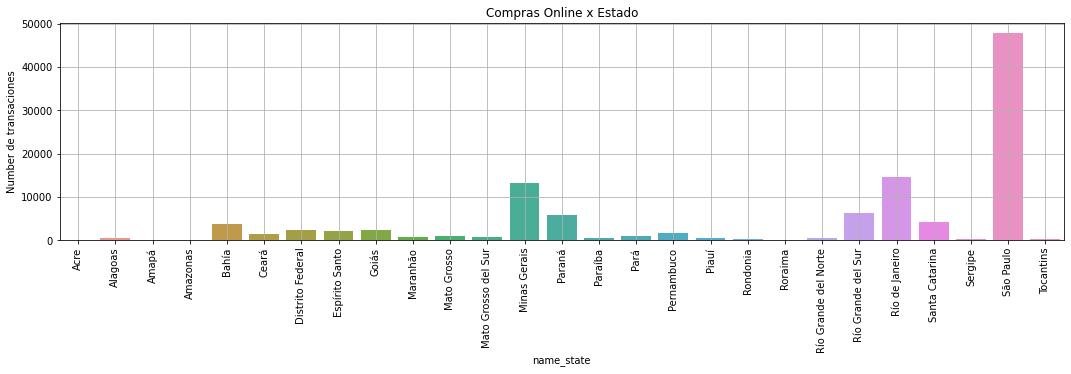

In [180]:
plt.figure(figsize=(18, 4))
aux=df.groupby('name_state').size().to_frame().rename(columns={0:'Number de transaciones'}).head(27).reset_index()
ax=sns.barplot(x='name_state',y='Number de transaciones',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Compras Online x Estado')
ax.grid()

Los estados que mas compras online realizan son Sao Pablo y Rio de Janeiro, las dos principales estados del pais.

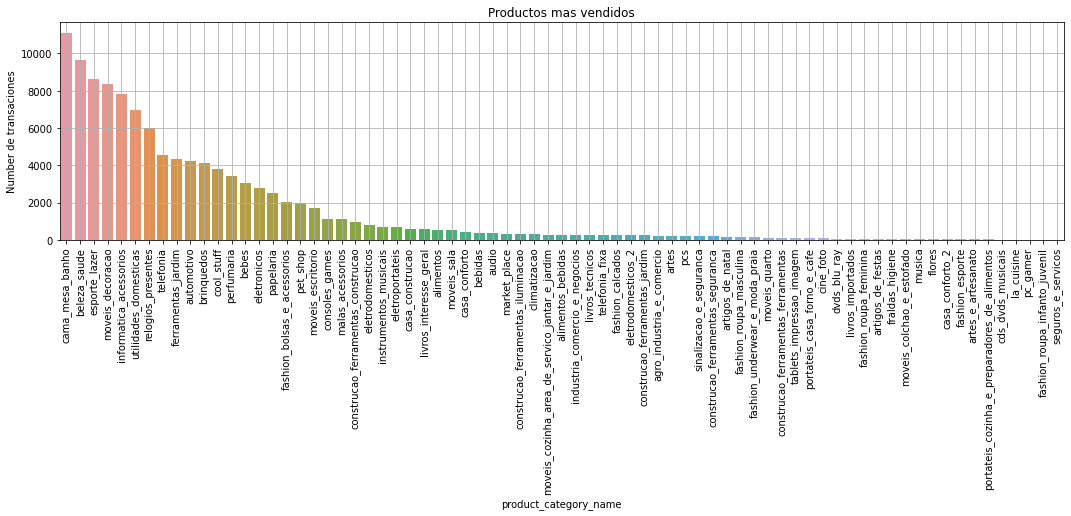

In [231]:
plt.figure(figsize=(18, 4))
aux=df.groupby('product_category_name').size().to_frame().rename(columns={0:'Number de transaciones'}).sort_values('Number de transaciones', ascending=False).head(74).reset_index()
listaP=list(aux["product_category_name"])
ax=sns.barplot(x='product_category_name',y='Number de transaciones',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Productos mas vendidos')
ax.grid()

De  4119  ciudades se grafican las 50 que registran mayor numero de ventas


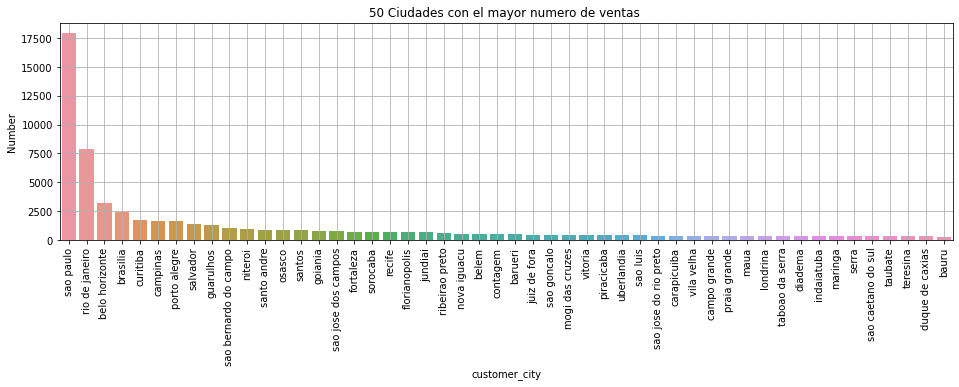

In [232]:
plt.figure(figsize=(16, 4))
aux=df.groupby('customer_city').size().to_frame().rename(columns={0:'Number'}).sort_values('Number', ascending=False).head(50).reset_index()
listaC=list(aux["customer_city"])
ax=sns.barplot(x='customer_city',y='Number',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('50 Ciudades con el mayor numero de ventas ')
ax.grid()
print("De ", len(df["customer_city"].unique()), " ciudades se grafican las 50 que registran mayor numero de ventas")

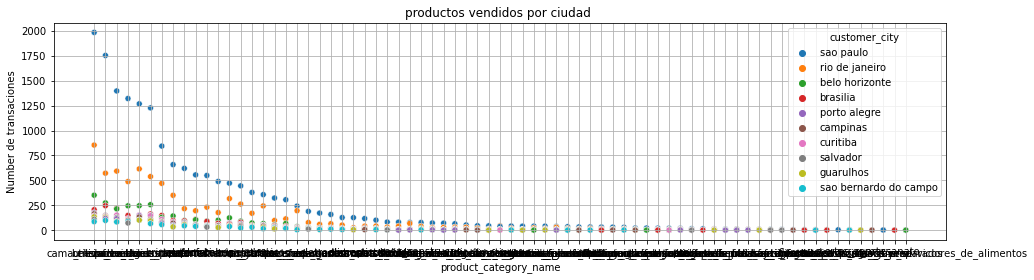

In [244]:
listaC=listaC[:10]
plt.figure(figsize=(16, 4))
aux=df[(df["customer_city"].isin(listaC))][["product_category_name","customer_city"]]
aux=aux.groupby(["product_category_name","customer_city"]).size().to_frame().rename(columns={0:'Number de transaciones'}).reset_index()
aux=aux.sort_values('Number de transaciones', ascending=False)
#aux=aux[:50]
#ax=sns.lineplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
ax=sns.scatterplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('productos vendidos por ciudad ')
ax.grid()

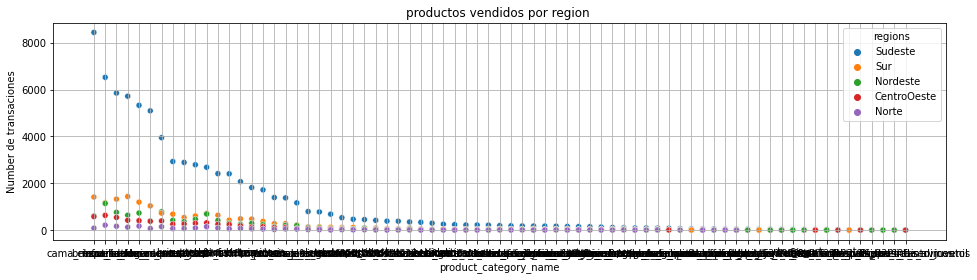

In [248]:
plt.figure(figsize=(16, 4))
aux=df[["product_category_name","regions"]]
aux=aux.groupby(["product_category_name","regions"]).size().to_frame().rename(columns={0:'Number de transaciones'}).reset_index()
aux=aux.sort_values('Number de transaciones', ascending=False)
#aux=aux[:50]
#ax=sns.lineplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
ax=sns.scatterplot(x='product_category_name', y='Number de transaciones', hue='regions', data=aux)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('productos vendidos por region ')
ax.grid()

# Tendencia de ventas por hora o dia de la semana LUISA

# Tendencias de Medio de pago (que tipo de relacion tiene, con que se puede correlacionar) RAMON

# Tendencias por cliente (relacion entre producto, tipo producto) HECTOR

In [103]:
#customer = pd.read_csv('Data/olist_customers_dataset.csv', delimiter=',') 
#geolocation=pd.read_csv('Data/olist_geolocation_dataset.csv', delimiter=',') 
#order_items=pd.read_csv('Data/olist_order_items_dataset.csv', delimiter=',') 
#order_payments=pd.read_csv('Data/olist_order_payments_dataset.csv', delimiter=',') 
#order_reviews=pd.read_csv('Data/olist_order_reviews_dataset.csv', delimiter=',') 
#orders=pd.read_csv('Data/olist_orders_dataset.csv', delimiter=',') 
#products=pd.read_csv('Data/olist_products_dataset.csv', delimiter=',') 
#sellers=pd.read_csv('Data/olist_sellers_dataset.csv', delimiter=',') 
#category=pd.read_csv('Data/product_category_name_translation.csv', delimiter=',') 

##  olist_sellers_dataset. ~ 3000 filas y 4 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|seller_id |STRING |Identificador único del vendedor|
|seller_zip_code_prefix |INT |Primeros 5 dígitos del código postal del vendedor|
|seller_city |STRING |Nombre de la ciudad del vendedor|
|seller_state |STRING |Estado del vendedor|

## olist_order robust_dataset. ~ 100,000 filas y 7 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|review_id |STRING |Identificador único de reseña|
|order_id |STRING |Identificador de pedido único|
|review_score |INT |Nota que va de 1 a 5 dada por el cliente en un encuesta de satisfacción.|
|review_comment_title |STRING |Título del comentario de la reseña que dejó el cliente,en portugues.|
|review_comment_message| STRING |Mensaje de comentario de la reseña que dejó el cliente, en portugués.|
|review_creation_date |STRING |Muestra la fecha en la que se realizó la encuesta de satisfacción.enviado al cliente.|
|review_answer_timestamp |STRING |Muestra la marca de tiempo de la respuesta de la encuesta de satisfacción.|

## olist_order_payments_dataset. ~ 100.000 filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|order_id |STRING |Identificador único de un pedido.|
|Payment_sequential |INT |Los clientes pueden pagar con más de un pago método. Si lo hacen, se crea una secuencia para acomodar todos los pagos|
|payment_type |STRING |Método de pago elegido por el cliente.|
|payment_installments |INT |Número de cuotas elegidas por el cliente.|
|Payment_value |FLOAT |Valor de transacción (BRL).|

## olist_geolocation_dataset. ~ 1 millón de filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|geolocation_zip_code_prefix |INT |Primeros cinco dígitos del código postal.|
|geolocatation_lat |FLOAT |Latitud asociada.|
|geolocation_lng |FLOAT |Longitud asociada.|
|geolocation_city |STRING |Nombre de la ciudad asociada.|
|geolocation_state |STRING |Nombre del estado asociado|